In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Image shape: (598, 282)
Image dtype: uint8


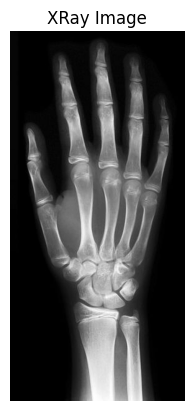

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage as nd

%matplotlib inline

image_path = '/content/drive/MyDrive/ColabNotebooks/Lab_1/xray.jpg'
image = Image.open(image_path)
image = np.array(image)
print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")

plt.figure(dpi=100)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("XRay Image")
plt.show()

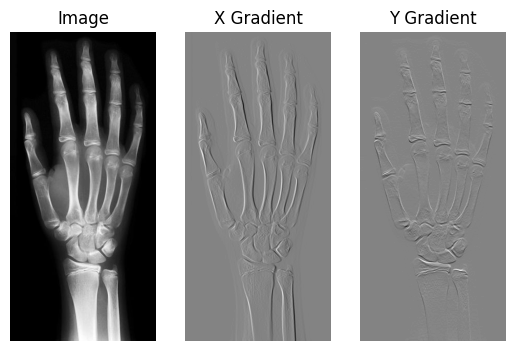

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage as nd

image_path = '/content/drive/MyDrive/ColabNotebooks/Lab_1/xray.jpg'
image = Image.open(image_path)
image = np.array(image)
row_gradient, col_gradient = np.gradient(image)

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()


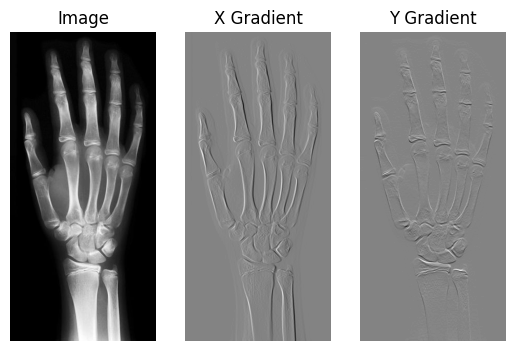

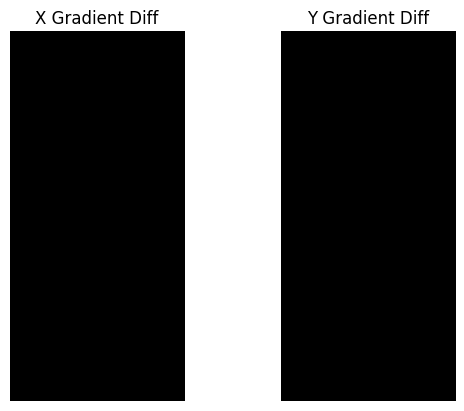

In [33]:
def our_gradient(image):
  row_gradient = np.zeros_like(image)
  col_gradient = np.zeros_like(image)
  for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
      row_gradient[i, j] = (image[i + 1, j] - image[i - 1, j]) / 2
      col_gradient[i, j] = (image[i, j + 1] - image[i,  j - 1]) / 2
  return row_gradient, col_gradient



our_row_gradient, our_col_gradient = np.gradient(image)

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(our_col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(our_row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()

# Difference images

x_gradient_diff = our_col_gradient - np_col_gradient
y_gradient_diff = our_row_gradient - np_row_gradient

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(x_gradient_diff, cmap='gray')
plt.axis('off')
plt.title("X Gradient Diff")
plt.subplot(1, 2, 2)
plt.imshow(y_gradient_diff, cmap='gray')
plt.axis('off')
plt.title("Y Gradient Diff")
plt.show()

In [37]:

mse = lambda a, b: np.mean((a - b) ** 2)
print(f"MSE between row gradients: {mse(row_gradient, our_row_gradient)}")
print(f"MSE between column gradients: {mse(col_gradient, our_col_gradient)}")

#If the prediction passes through all data points, the mean squared error is zero

MSE between row gradients: 0.0
MSE between column gradients: 0.0


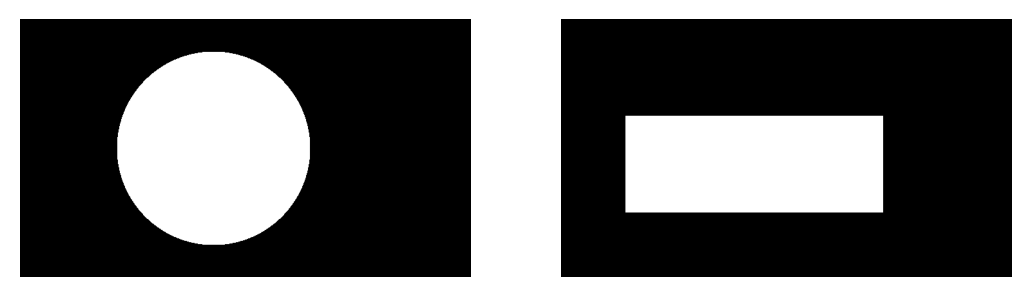

In [64]:
def generate_circle(x_size, y_size, x_origin, y_origin, radius):
    circle = np.zeros((y_size, x_size))
    for i in range(y_size):
        for j in range(x_size):
            circle[i, j] = (x_origin - j)**2 + (y_origin - i)**2 < radius**2
    return circle

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
    rectangle = np.zeros((y_size, x_size))
    for i in range(y_b, y_b + height):
        for j in range(x_b, x_b + width):
            if 0 <= i < y_size and 0 <= j < x_size:
                rectangle[i, j] = 1
    return rectangle

x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_circle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

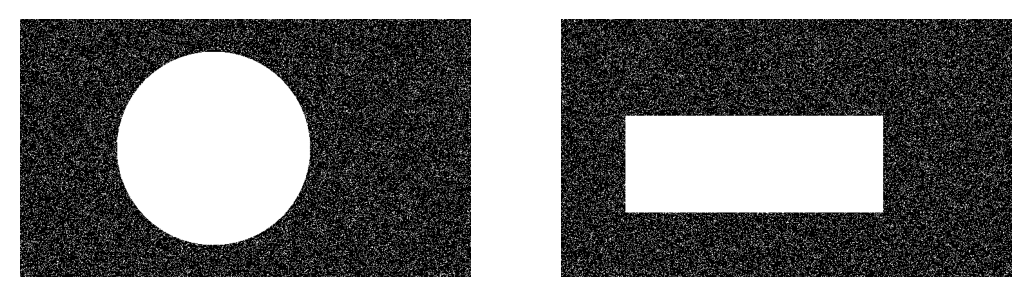

In [65]:
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

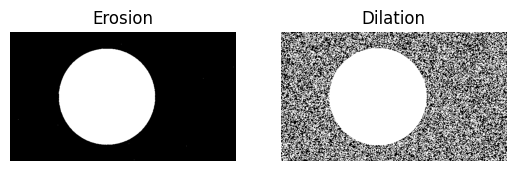

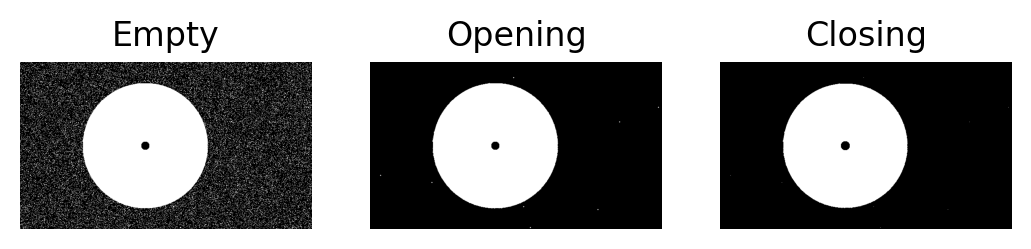

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd


eroded_circle = nd.binary_erosion(circle)
dilated_circle = nd.binary_dilation(circle)

inner_circle = generate_circle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle))
opened_circle = nd.binary_opening(empty_circle)
closed_opened_circle = nd.binary_erosion(opened_circle)

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()


In [77]:
import numpy as np

def erosion(image, se):
    eroded_image = np.zeros_like(image)
    se_height, se_width = se.shape
    pad_height, pad_width = se_height // 2, se_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    for i in range(pad_height, padded_image.shape[0] - pad_height):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            if np.all(padded_image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1] == se):
                eroded_image[i-pad_height, j-pad_width] = 1
    return eroded_image

def dilation(image, se):
    dilated_image = np.zeros_like(image)
    se_height, se_width = se.shape
    pad_height, pad_width = se_height // 2, se_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    for i in range(pad_height, padded_image.shape[0] - pad_height):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            if np.any(padded_image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1] == se):
                dilated_image[i-pad_height, j-pad_width] = 1
    return dilated_image

def opening(image, se):
    return dilation(erosion(image, se), se)

def closing(image, se):
    return erosion(dilation(image, se), se)


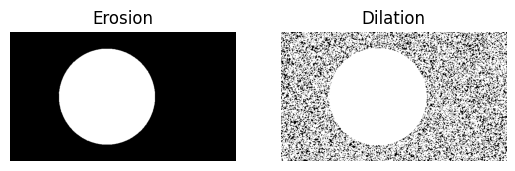

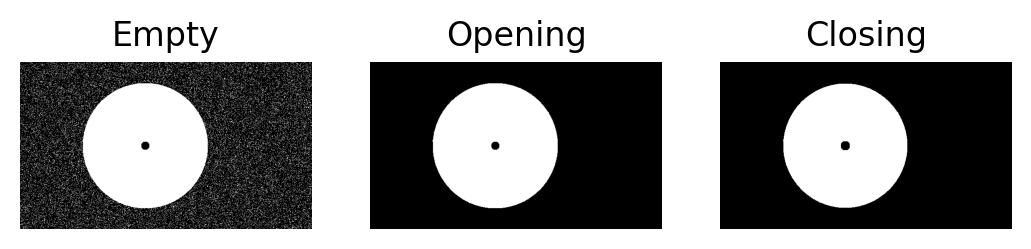

In [82]:
import numpy as np

se = np.ones((3, 3), dtype=bool)

own_eroded_circle = erosion(circle, se)
own_dilated_circle = dilation(circle, se)
inner_circle = generate_circle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle))
own_opened_circle = opening(empty_circle, se)
own_closed_opened_circle = erosion(opened_circle, se)

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(own_eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(own_dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(own_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(own_closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()


In [85]:
mse = lambda a, b: np.mean(np.logical_xor(a, b).astype(int))

print(f"MSE between erosions: {mse(eroded_circle, own_eroded_circle)}")
print(f"MSE between dilations: {mse(dilated_circle, own_dilated_circle)}")
print(f"MSE between closing results: {mse(closed_opened_circle, own_closed_opened_circle)}")
print(f"MSE between opening results: {mse(opened_circle, own_opened_circle)}")

MSE between erosions: 0.0
MSE between dilations: 0.0
MSE between closing results: 0.0
MSE between opening results: 0.0
